In [1]:
import numpy as np
from matplotlib import pyplot as plt 
import glauber 
import time

In [13]:
Lx = 2
Ly = 2
J = glauber.nn_coupling(-1,Lx,Ly)
Jr = glauber.nn_coupling_random(-1.,0.5,Lx,Ly)

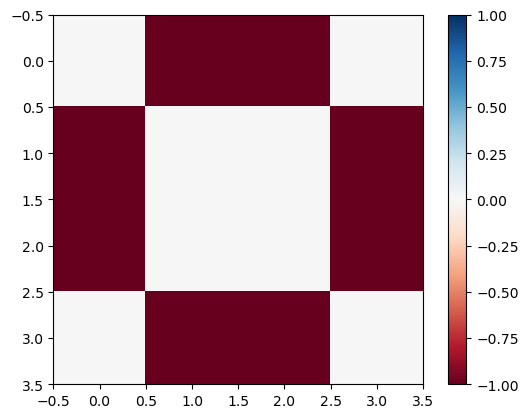

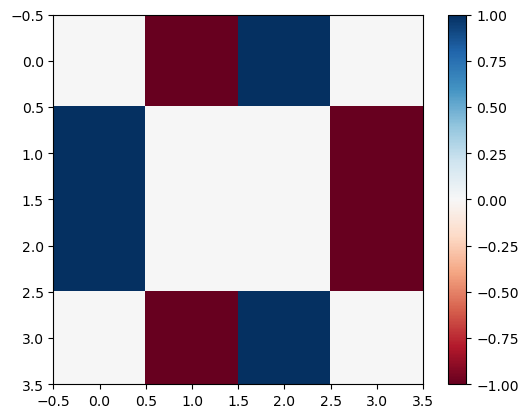

In [15]:
plt.imshow(np.transpose(J[:,:]),cmap='RdBu',vmax=1.,vmin=-1.)
plt.colorbar()
plt.show()
plt.imshow(np.transpose(Jr[:,:]) ,cmap='RdBu',vmin=-1.,vmax=1.)
plt.colorbar()
plt.show()

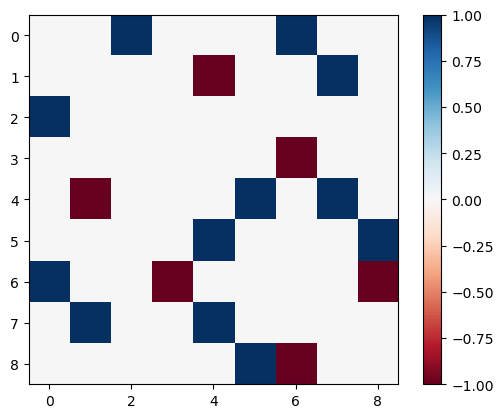

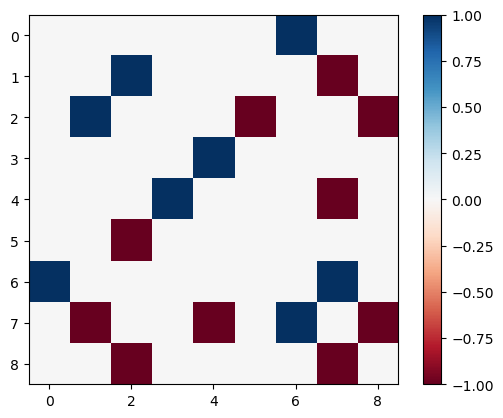

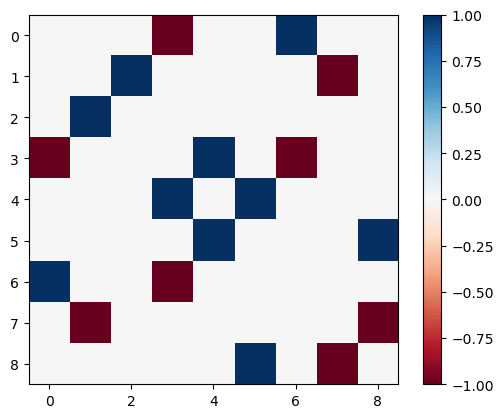

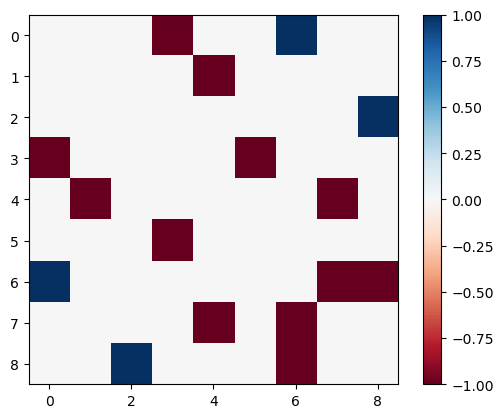

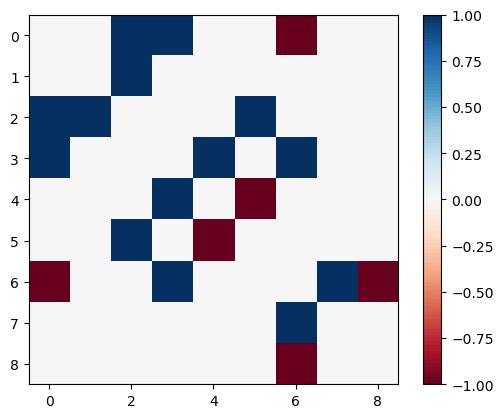

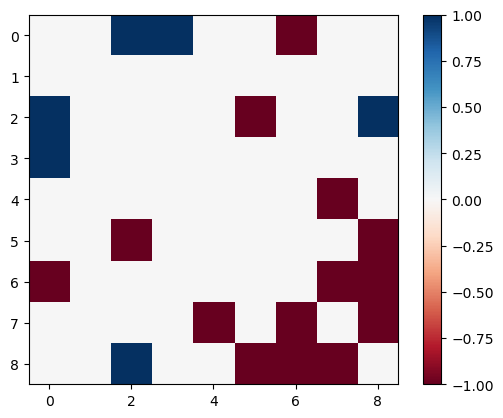

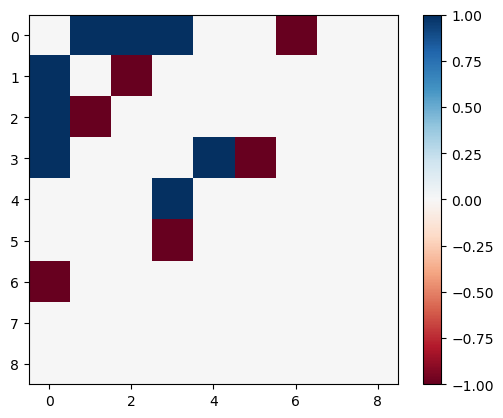

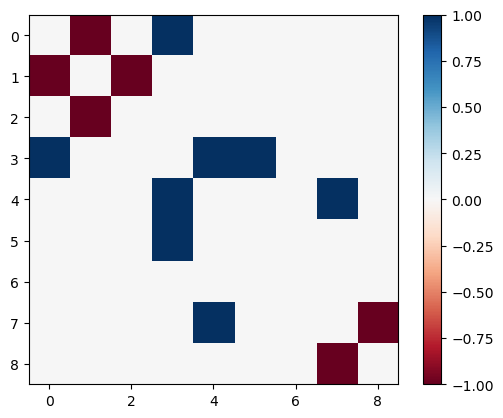

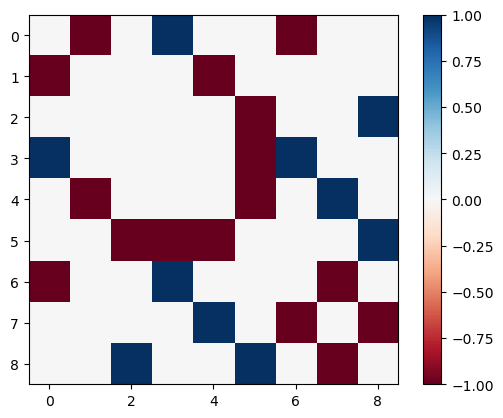

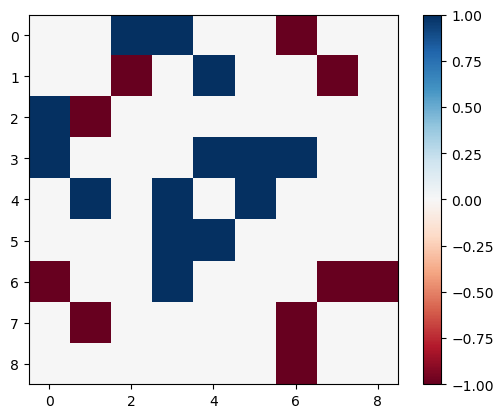

In [30]:
Lx = 3
Ly = 3

nJs = 10 
Js = np.zeros((nJs,Lx*Ly,Lx*Ly))

for i in range(nJs):
    Js[i,:,:] = glauber.nn_coupling_random(-1.,0.5,Lx,Ly)

    plt.imshow(Js[i,:,:],cmap='RdBu')
    plt.colorbar()
    plt.show()

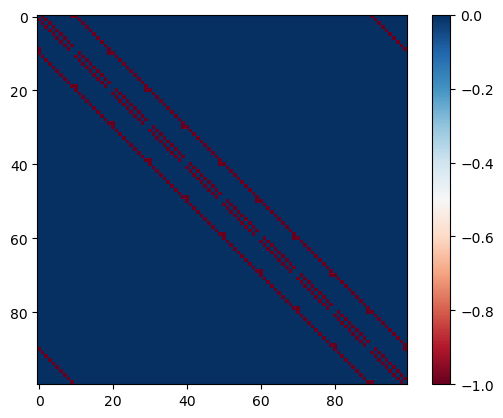

In [20]:
Lx = 10
Ly = 10

nrealizations = 10 
J_realizations = np.zeros((nrealizations,Lx*Ly))



spins_initial = glauber.initialize_spins(Lx,Ly,random=True)

J_matrix = glauber.nn_coupling(-1.,Lx,Ly)
nn_matrix = glauber.nn_indices(Lx,Ly)
#J_matrix = glauber.nn_coupling_random(-1.,0.5,Lx,Ly)

plt.imshow(J_matrix,cmap='RdBu')
plt.colorbar()
plt.show()

nTs = 7
Ts = np.linspace(2.,0.5,nTs)

nsweeps = 1000
mags = np.zeros((nTs,nsweeps))
spins = np.zeros((nTs,Lx*Ly,nsweeps))
times = np.zeros((2,nTs))



In [130]:
for i in range(nTs):
    t0 = time.time()
    spins[i,:,:] = glauber.dynamics(spins_initial,nsweeps,J_matrix,Ts[i],nn_matrix)
    t1 = time.time()
    print("nn_only: ",t1-t0,"s")
    #spins = glauber.dynamics(spins_initial,nsweeps,J_matrix,Ts[i])
    #t2 = time.time()
    spins_initial = spins[i,:,-1]
    mags[i,:] = glauber.calc_mag(spins[i,:,:])
    times[0,i] = t1 - t0
    #times[1,i] = t2-t1
    #print("all: ",t2-t1,"s")

nn_only:  1.9466700553894043 s
nn_only:  1.9810709953308105 s
nn_only:  2.2890450954437256 s
nn_only:  2.26631498336792 s
nn_only:  2.400296926498413 s
nn_only:  2.3151438236236572 s
nn_only:  2.0124752521514893 s


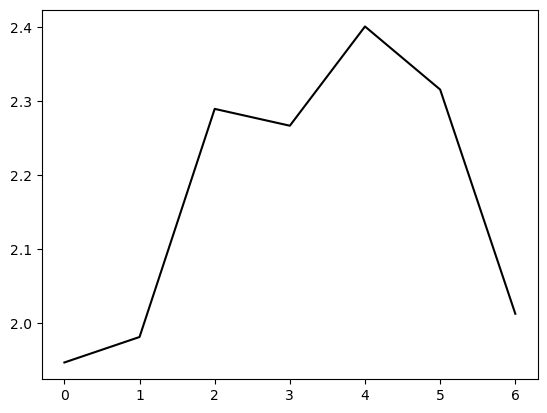

In [131]:
plt.plot(times[0,:],color='black')
#plt.plot(times[1,:],color='red')
plt.show()

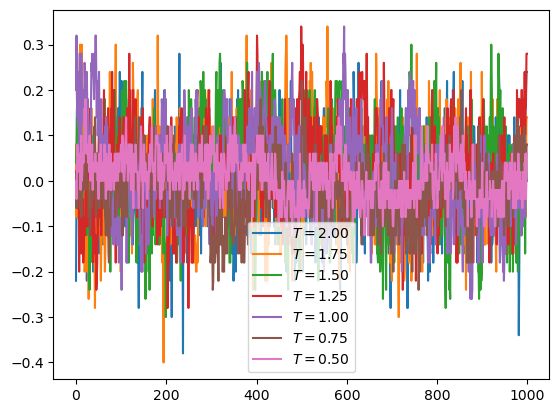

In [125]:
for i in range(nTs): plt.plot(mags[i,:],label=r'$T = $'+f"{Ts[i]:0.2f}")
plt.legend()
plt.show()



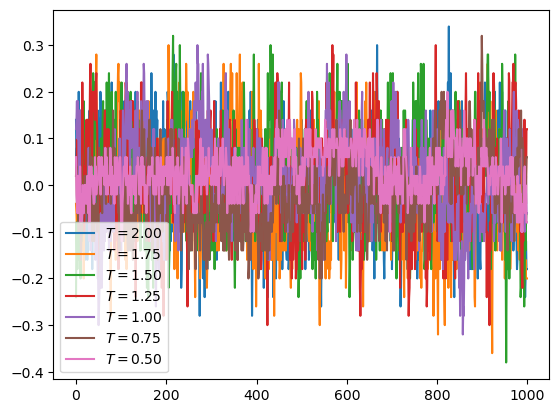

In [132]:
for i in range(nTs): plt.plot(mags[i,:],label=r'$T = $'+f"{Ts[i]:0.2f}")
plt.legend()
plt.show()



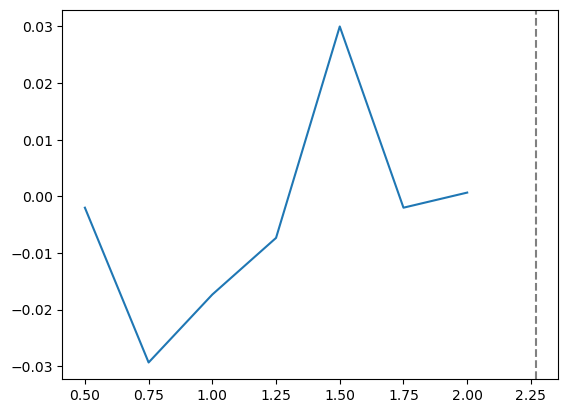

In [126]:
plt.plot(Ts,np.mean(mags[:,-300:-1:10],axis=1))
plt.axvline(2./np.log(1.+np.sqrt(2.)),linestyle='dashed',color='gray')
plt.show()

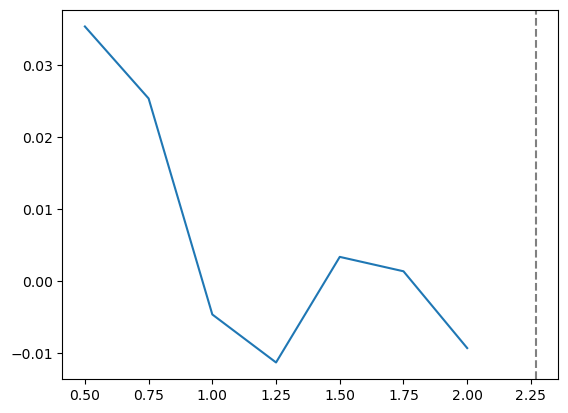

In [133]:
plt.plot(Ts,np.mean(mags[:,-300:-1:10],axis=1))
plt.axvline(2./np.log(1.+np.sqrt(2.)),linestyle='dashed',color='gray')
plt.show()

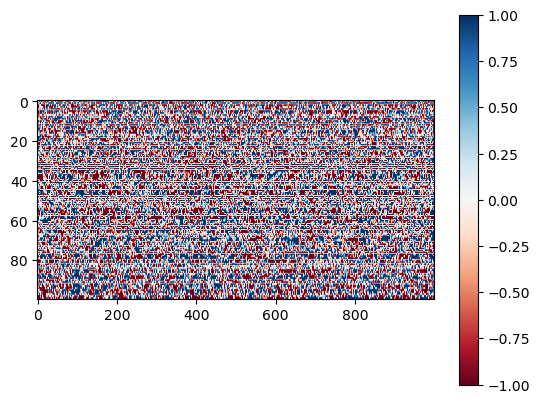

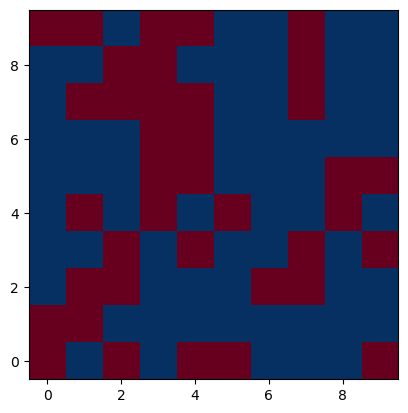

In [127]:
plt.imshow(spins[0,:,:],cmap='RdBu',aspect=5)
plt.colorbar()
plt.show()
plt.imshow(spins[0,:,-1].reshape(Lx,Ly),origin='lower',cmap='RdBu')
plt.show()

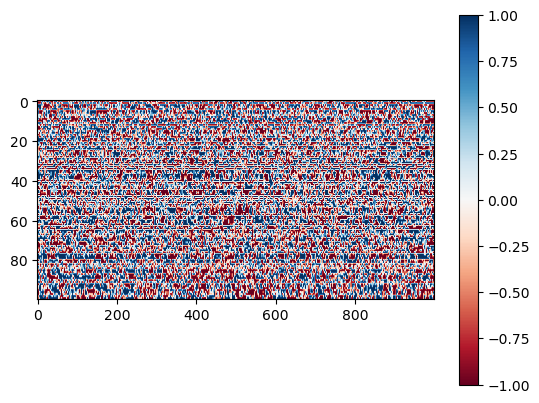

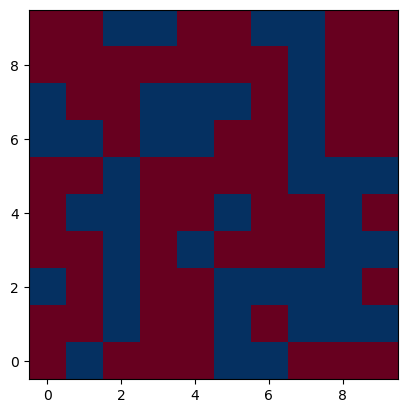

In [134]:
plt.imshow(spins[0,:,:],cmap='RdBu',aspect=5)
plt.colorbar()
plt.show()
plt.imshow(spins[0,:,-1].reshape(Lx,Ly),origin='lower',cmap='RdBu')
plt.show()

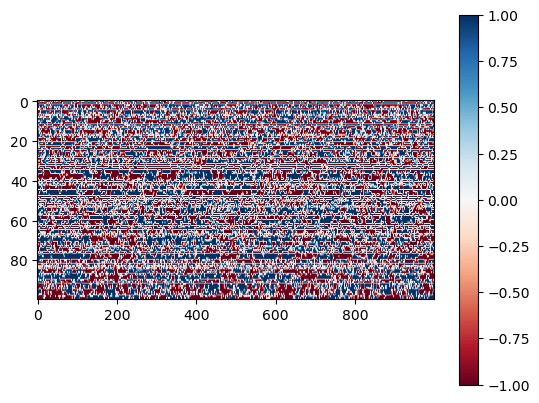

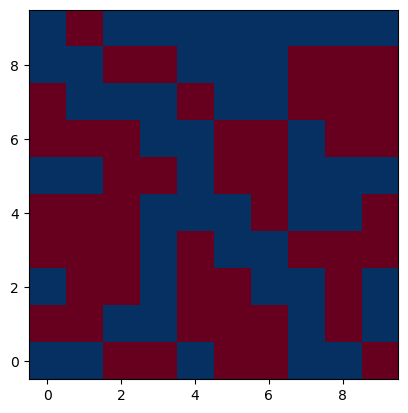

In [128]:
plt.imshow(spins[2,:,:],cmap='RdBu',aspect=5)
plt.colorbar()
plt.show()
plt.imshow(spins[2,:,-1].reshape(Lx,Ly),origin='lower',cmap='RdBu')
plt.show()

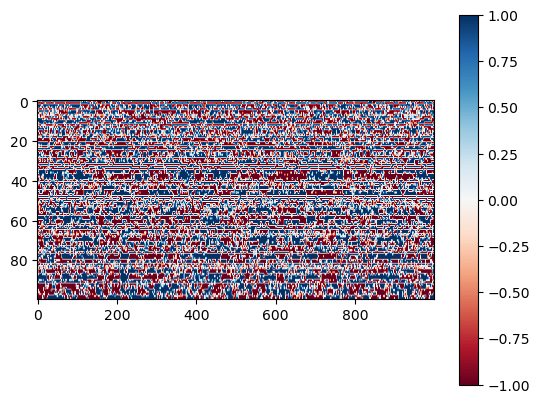

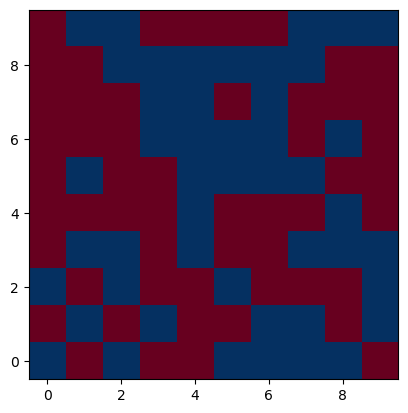

In [135]:
plt.imshow(spins[2,:,:],cmap='RdBu',aspect=5)
plt.colorbar()
plt.show()
plt.imshow(spins[2,:,-1].reshape(Lx,Ly),origin='lower',cmap='RdBu')
plt.show()

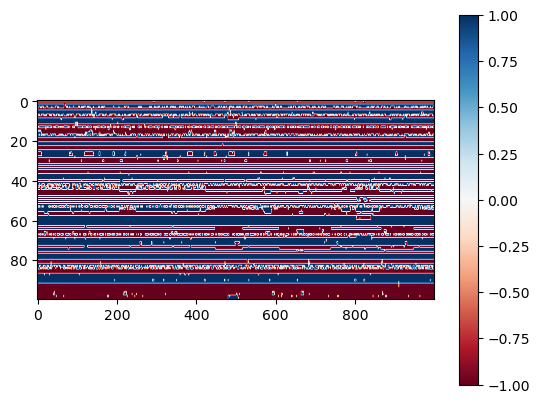

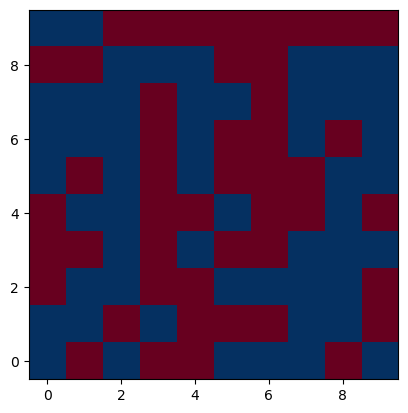

In [129]:
plt.imshow(spins[-1,:,:],cmap='RdBu',aspect=5)
plt.colorbar()
plt.show()
plt.imshow(spins[-1,:,-1].reshape(Lx,Ly),origin='lower',cmap='RdBu')
plt.show()

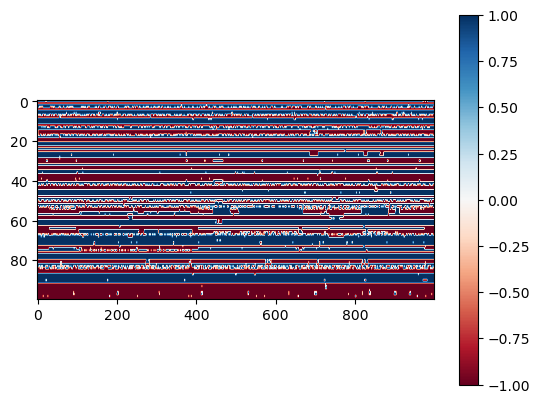

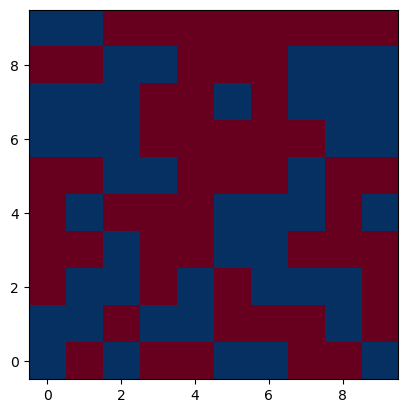

In [136]:
plt.imshow(spins[-1,:,:],cmap='RdBu',aspect=5)
plt.colorbar()
plt.show()
plt.imshow(spins[-1,:,-1].reshape(Lx,Ly),origin='lower',cmap='RdBu')
plt.show()

In [21]:
nreplicas = 5
replicas = np.zeros((nreplicas,Lx*Ly,nsweeps))

In [22]:
T = 0.6

In [23]:
initial = glauber.initialize_spins(Lx,Ly,random=True)

In [24]:
for i in range(nreplicas):
    t0 = time.time()
    replicas[i,:,:] = glauber.dynamics(initial,nsweeps,J_matrix,T,nn_matrix)
    t1 = time.time()
    print("nn_only: ",t1-t0,"s")


nn_only:  1.962583065032959 s
nn_only:  1.889240026473999 s
nn_only:  1.7731518745422363 s
nn_only:  1.7501428127288818 s
nn_only:  1.9294497966766357 s


In [25]:
q = np.einsum('art,brt->abt',replicas,replicas)/(Lx*Ly)

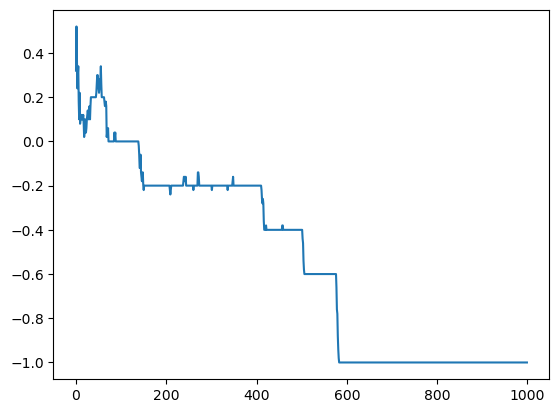

In [26]:
plt.plot(q[0,2,:])
plt.show()